
# **Analysis of Crime Near CTA Stations**

This notebook with focus on looking at speicifc crime rates on the CTA

**Team Memebers: Amina Marin**


Import necessary data and create necessary dataframes

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import data sets to see total number of crimes / crime types in the years 2020 - 2024
df_crime2020 = pd.read_csv('data/CTA_Data/CTA_Crimes_2020.csv')
df_crime2021 = pd.read_csv('data/CTA_Data/CTA_Crimes_2021.csv')
df_crime2022 = pd.read_csv('data/CTA_Data/CTA_Crimes_2022.csv')
df_crime2023 = pd.read_csv('data/CTA_Data/CTA_Crimes_2023.csv')
df_crime2024 = pd.read_csv('data/CTA_Data/CTA_Crimes_2024.csv')

## **CTA Crimes By Year**

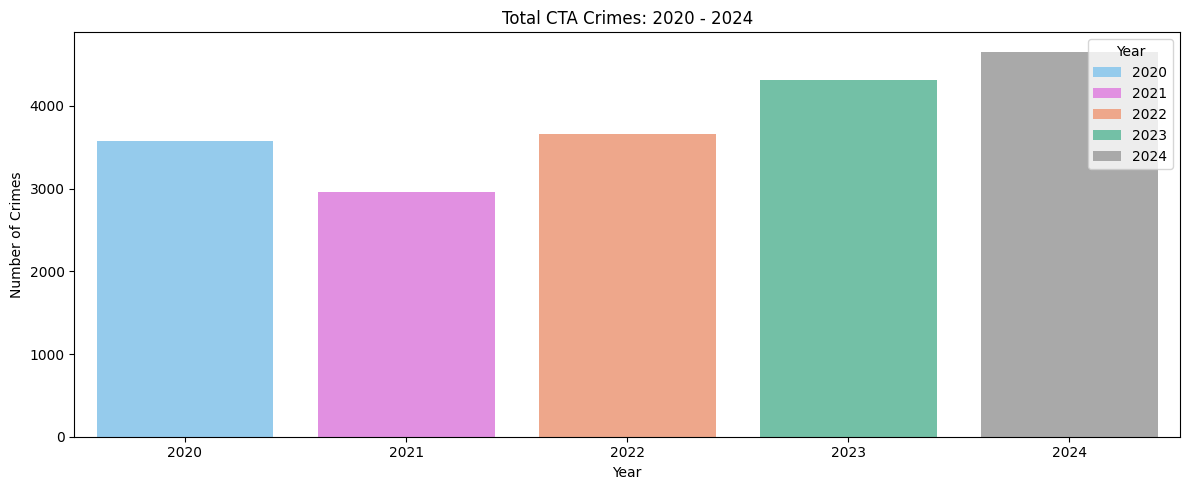

In [12]:
# create a barplot displaying the total crimes for each year
total = pd.DataFrame({
    'Year': [2020,2021,2022,2023,2024],
    'Total Crimes': [len(df_crime2020), len(df_crime2021), len(df_crime2022), len(df_crime2023), len(df_crime2024)]
})
plt.figure(figsize = (12,5))
sns.barplot(data=total, x='Year', y='Total Crimes', hue='Year', hue_order=[2020,2021,2022,2023,2024], 
            palette=['lightskyblue','violet','lightsalmon', 'mediumaquamarine','darkgray'])
plt.title('Total CTA Crimes: 2020 - 2024')
plt.ylabel('Number of Crimes')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

## **CTA Crimes by Month**

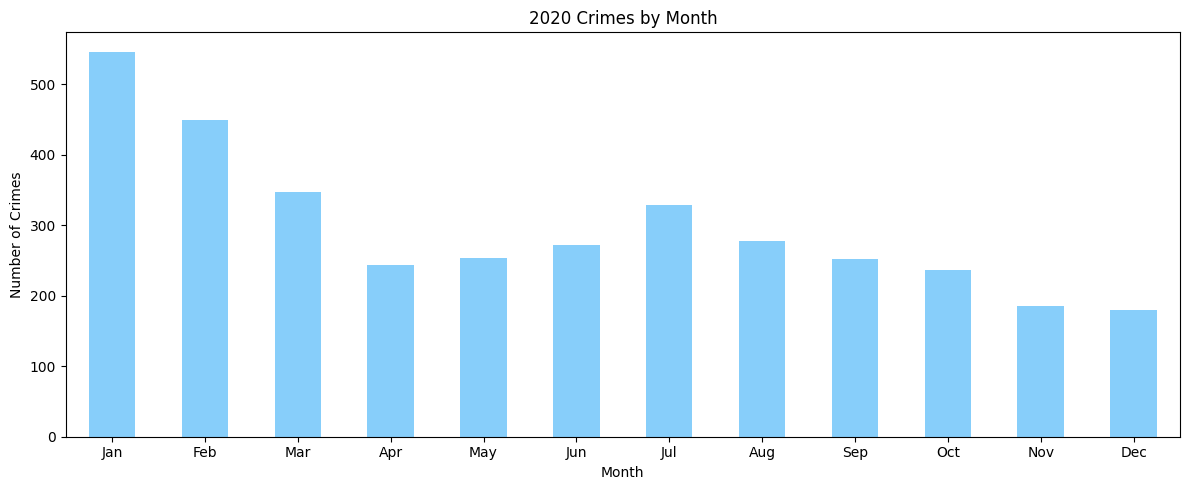

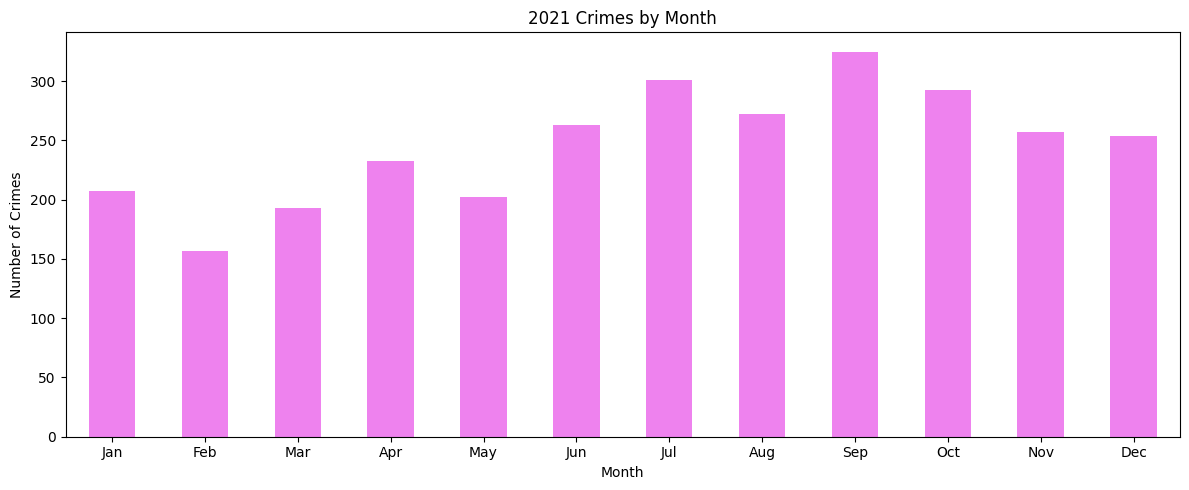

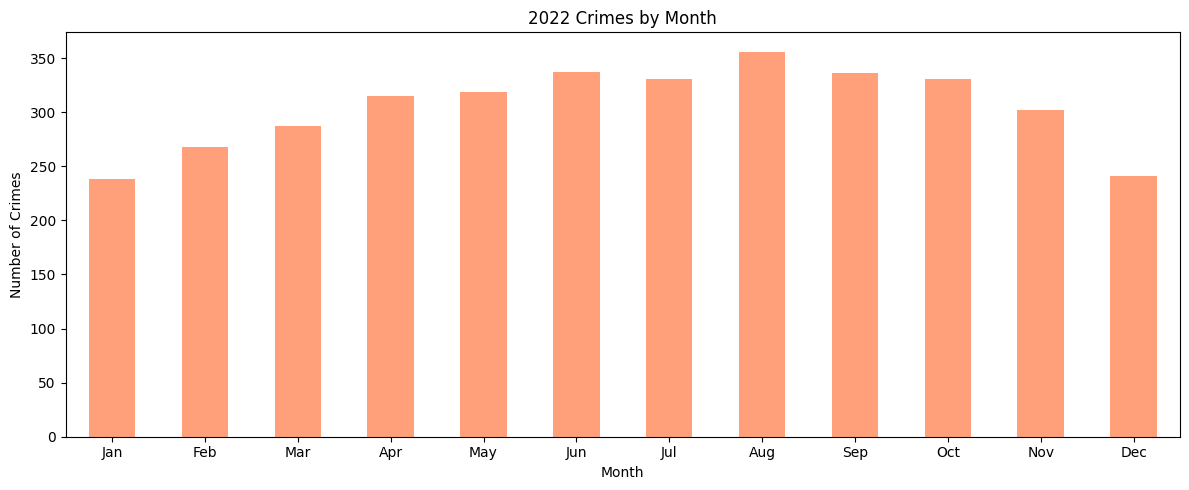

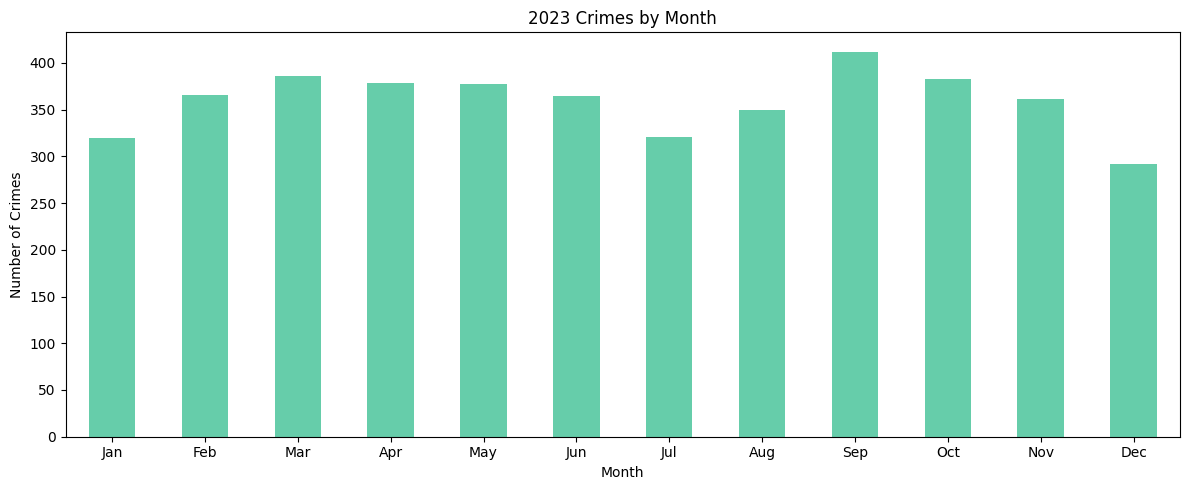

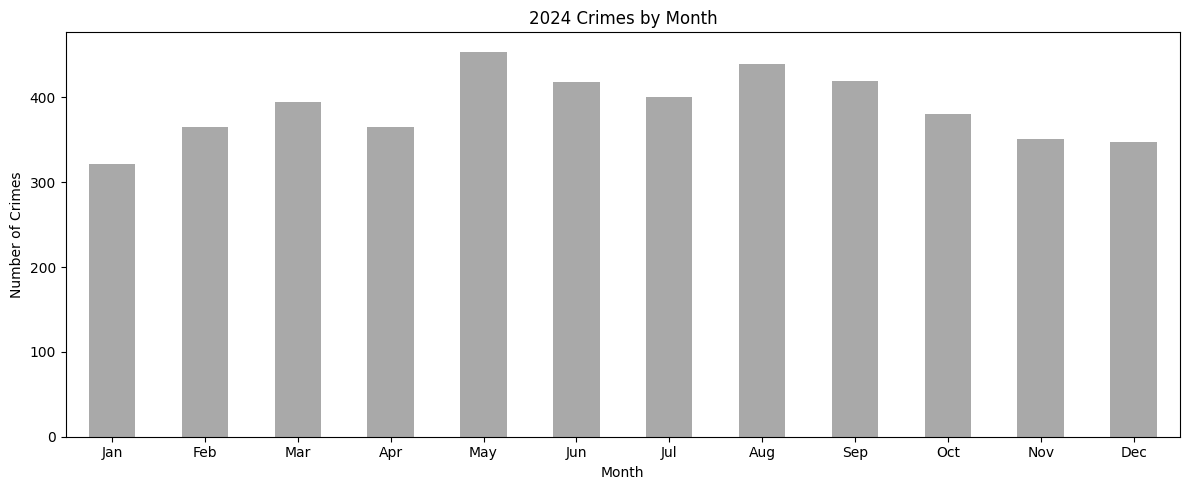

In [13]:
# convert date columns to datetime format
df_crime2020['Date'] = pd.to_datetime(df_crime2020['Date'])
df_crime2021['Date'] = pd.to_datetime(df_crime2021['Date'])
df_crime2022['Date'] = pd.to_datetime(df_crime2022['Date'])
df_crime2023['Date'] = pd.to_datetime(df_crime2023['Date'])
df_crime2024['Date'] = pd.to_datetime(df_crime2024['Date'])

# 2020 months
df_crime2020['Month'] = df_crime2020['Date'].dt.month
months_2020 = df_crime2020['Month'].value_counts().sort_index()

months_2020.plot(kind='bar', figsize=(12,5), color='lightskyblue')
plt.xticks(ticks=range(0,12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    rotation=0)
plt.title('2020 Crimes by Month')
plt.ylabel('Number of Crimes')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

# 2021 months
df_crime2021['Month'] = df_crime2021['Date'].dt.month
months_2021 = df_crime2021['Month'].value_counts().sort_index()

months_2021.plot(kind='bar', figsize=(12,5), color='violet')
plt.xticks(ticks=range(0,12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    rotation=0)
plt.title('2021 Crimes by Month')
plt.ylabel('Number of Crimes')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

# 2022 months
df_crime2022['Month'] = df_crime2022['Date'].dt.month
months_2022 = df_crime2022['Month'].value_counts().sort_index()

months_2022.plot(kind='bar', figsize=(12,5), color='lightsalmon')
plt.xticks(ticks=range(0,12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    rotation=0)
plt.title('2022 Crimes by Month')
plt.ylabel('Number of Crimes')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

# 2023 months
df_crime2023['Month'] = df_crime2023['Date'].dt.month
months_2023 = df_crime2023['Month'].value_counts().sort_index()

months_2023.plot(kind='bar', figsize=(12,5), color='mediumaquamarine')
plt.xticks(ticks=range(0,12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    rotation=0)
plt.title('2023 Crimes by Month')
plt.ylabel('Number of Crimes')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

# 2024 months
df_crime2024['Month'] = df_crime2024['Date'].dt.month
months_2024 = df_crime2024['Month'].value_counts().sort_index()

months_2024.plot(kind='bar', figsize=(12,5), color='darkgray')
plt.xticks(ticks=range(0,12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    rotation=0)
plt.title('2024 Crimes by Month')
plt.ylabel('Number of Crimes')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

## **CTA Crime by Month Combined**

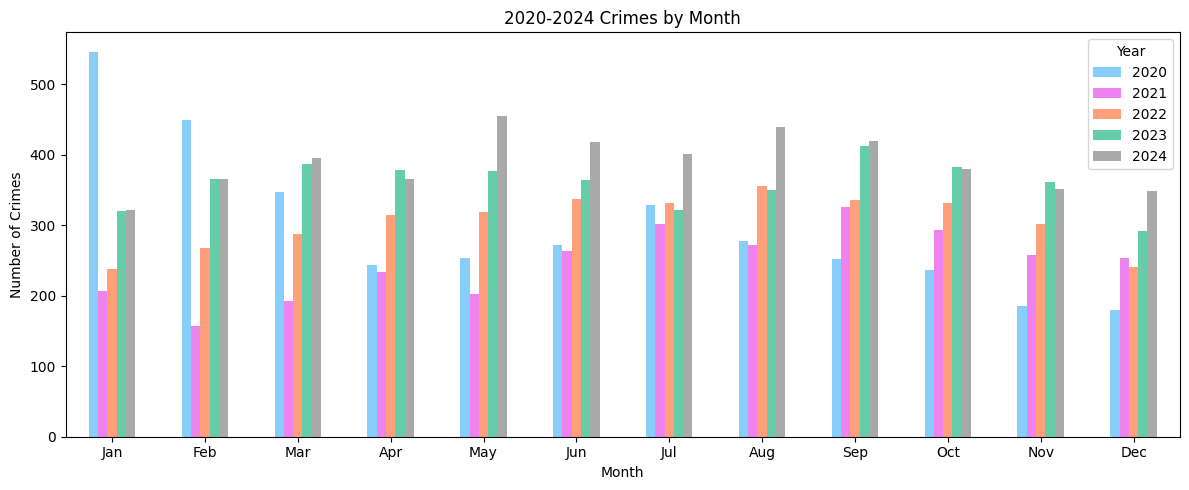

In [29]:
# assign years
df_crime2020['Year'] = 2020
df_crime2021['Year'] = 2021
df_crime2022['Year'] = 2022
df_crime2023['Year'] = 2023
df_crime2024['Year'] = 2024

# combine the dataframes by month
combined = pd.concat([df_crime2020, df_crime2021, df_crime2022, df_crime2023, df_crime2024], ignore_index=True)
combined['Date'] = pd.to_datetime(combined['Date'])
combined['Month'] = combined['Date'].dt.month

# group by month and year
grouped = combined.groupby(['Month', 'Year']).size().unstack()

# create barplot
grouped.plot(kind='bar', figsize=(12,5), color=['lightskyblue','violet','lightsalmon', 'mediumaquamarine','darkgray'])
plt.xticks(ticks=range(0,12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    rotation=0)
plt.title('2020-2024 Crimes by Month')
plt.ylabel('Number of Crimes')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

## **Crime Types**

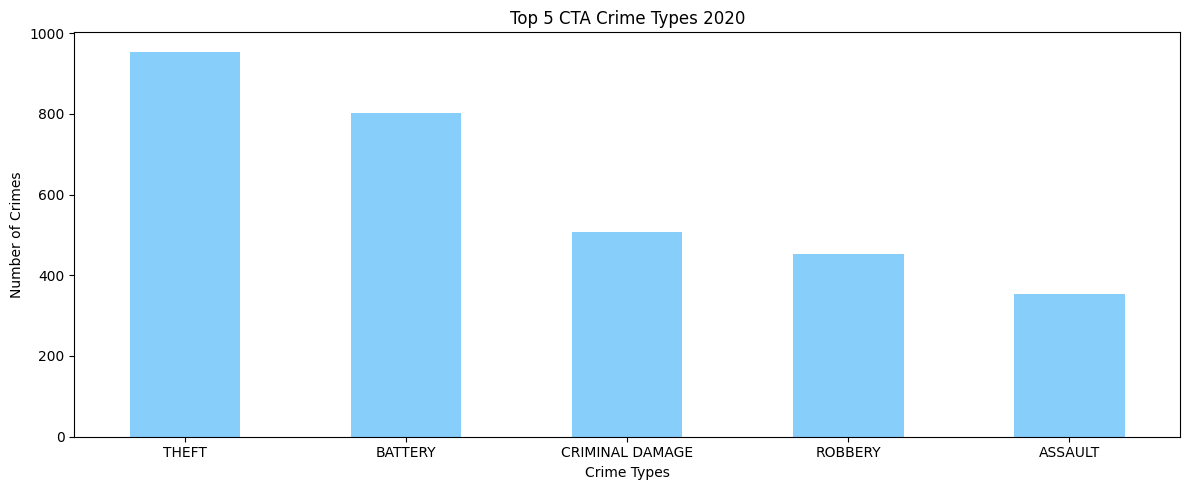

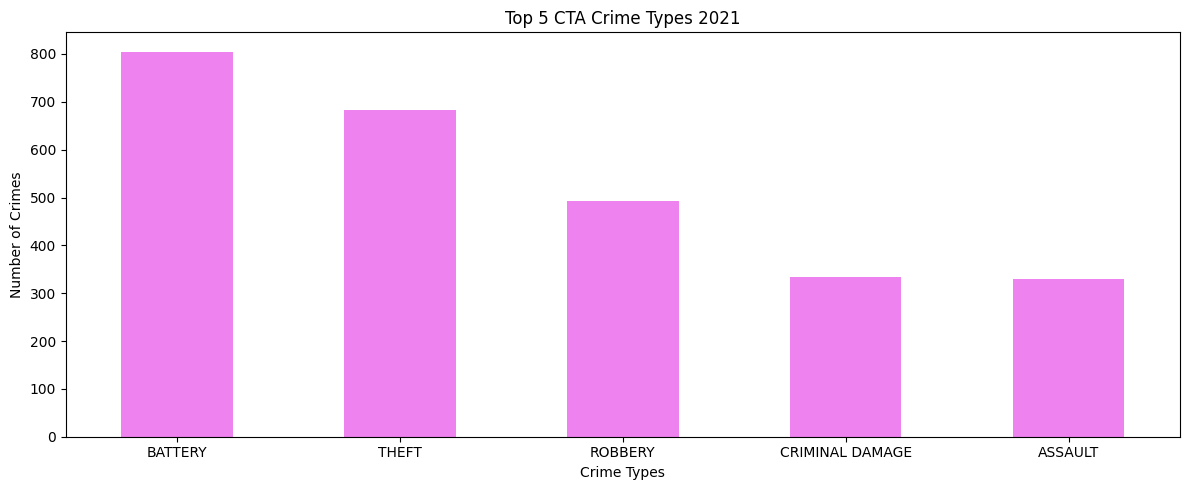

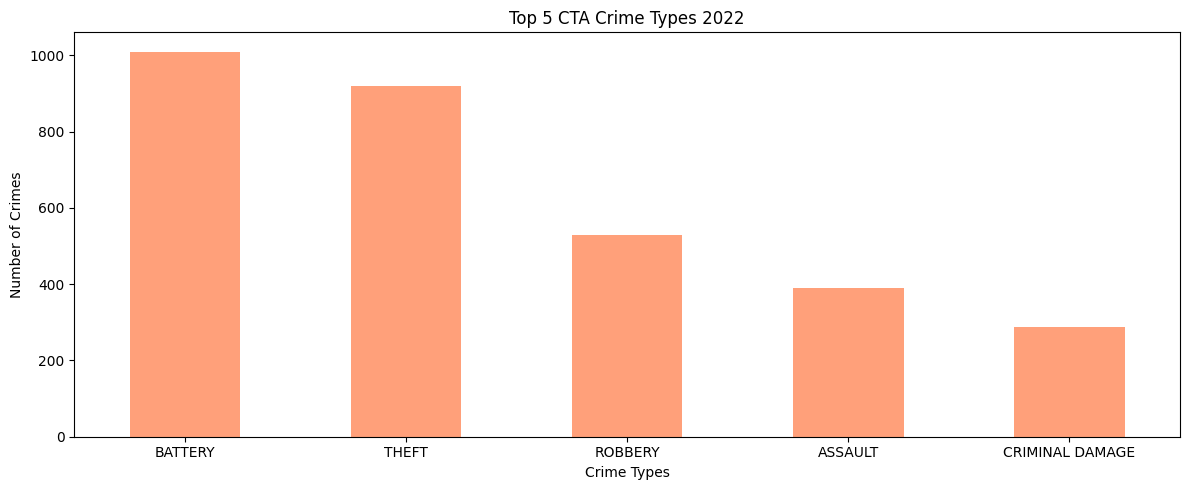

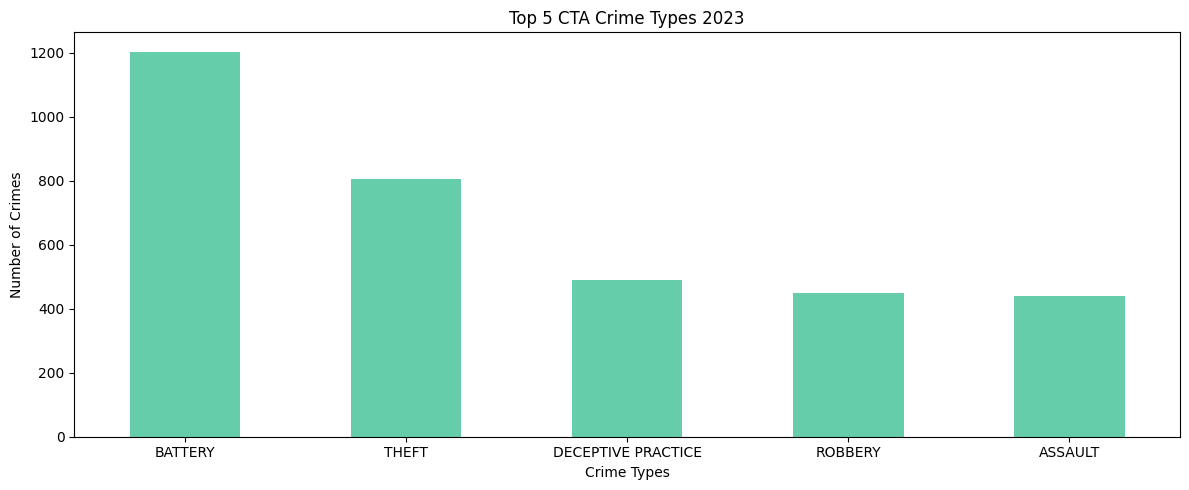

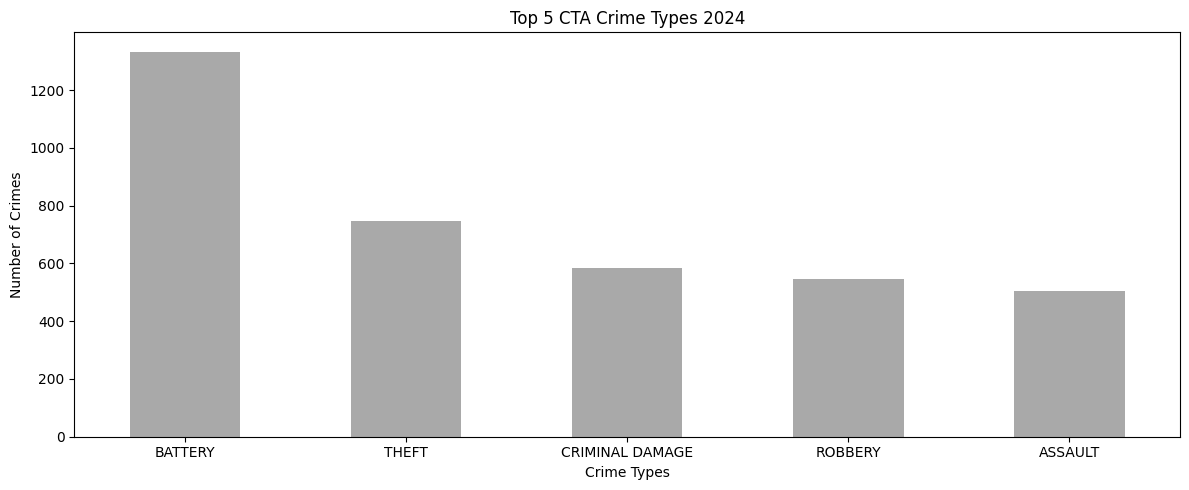

In [6]:
# create a unique dataframes for types of crimes
# 2020
types_2020 = df_crime2020['Primary Type'].value_counts()
types_2020 = types_2020[types_2020 > 0]
top5_2020 = df_crime2020['Primary Type'].value_counts().head(5)
# barplot
top5_2020.plot(kind='bar', figsize=(12,5), color='lightskyblue')
plt.xticks(rotation=0)
plt.title('Top 5 CTA Crime Types 2020')
plt.xlabel('Crime Types')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

# 2021
types_2021 = df_crime2021['Primary Type'].value_counts()
types_2021 = types_2021[types_2021 > 0]
top5_2021 = df_crime2021['Primary Type'].value_counts().head(5)
# barplot
top5_2021.plot(kind='bar', figsize=(12,5), color='violet')
plt.xticks(rotation=0)
plt.title('Top 5 CTA Crime Types 2021')
plt.xlabel('Crime Types')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

# 2022
types_2022 = df_crime2022['Primary Type'].value_counts()
types_2022 = types_2022[types_2022 > 0]
top5_2022 = df_crime2022['Primary Type'].value_counts().head(5)
# barplot
top5_2022.plot(kind='bar', figsize=(12,5), color='lightsalmon')
plt.xticks(rotation=0)
plt.title('Top 5 CTA Crime Types 2022')
plt.xlabel('Crime Types')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

# 2023
types_2023 = df_crime2023['Primary Type'].value_counts()
types_2023 = types_2023[types_2023 > 0]
top5_2023 = df_crime2023['Primary Type'].value_counts().head(5)
# barplot
top5_2023.plot(kind='bar', figsize=(12,5), color='mediumaquamarine')
plt.xticks(rotation=0)
plt.title('Top 5 CTA Crime Types 2023')
plt.xlabel('Crime Types')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

# 2024
types_2024 = df_crime2024['Primary Type'].value_counts()
types_2024 = types_2024[types_2024 > 0]
top5_2024 = df_crime2024['Primary Type'].value_counts().head(5)
# barplot
top5_2024.plot(kind='bar', figsize=(12,5), color='darkgray')
plt.xticks(rotation=0)
plt.title('Top 5 CTA Crime Types 2024')
plt.xlabel('Crime Types')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

## **Combined**

In [ ]:
# combine the dataframes by month
combined = pd.concat([top5_2020, top5_2021, top5_2022, top5_2023, top5_2024], ignore_index=True)
combined['Date'] = pd.to_datetime(combined['Date'])
combined['Month'] = combined['Date'].dt.month

# group by month and year
grouped = combined.groupby(['Month', 'Year']).size().unstack()

# create barplot
grouped.plot(kind='bar', figsize=(12,5), color=['lightskyblue','violet','lightsalmon', 'mediumaquamarine','darkgray'])
plt.xticks(ticks=range(0,12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    rotation=0)
plt.title('2020-2024 Crime Types')
plt.ylabel('Number of Crimes')
plt.xlabel('Month')
plt.tight_layout()
plt.show()